In [129]:
# imports required
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [130]:
# read the data, and display head
data = pd.read_csv('Original_data.csv')
print(data.head())
# print("Data shape: ", data.shape)
# print("Column data types: ", data.dtypes)
# print("Summary: ", data.info())



       Species Population  Latitude  Longitude  Year_start  Year_end  \
0  D._aldrichi    Binjour    -25.52     151.45        1994      1994   
1  D._aldrichi    Binjour    -25.52     151.45        1994      1994   
2  D._aldrichi    Binjour    -25.52     151.45        1994      1994   
3  D._aldrichi    Binjour    -25.52     151.45        1994      1994   
4  D._aldrichi    Binjour    -25.52     151.45        1994      1994   

   Temperature  Vial  Replicate     Sex Thorax_length     l2    l3p    l3d  \
0           20     1          1  female         1.238  2.017  0.659  1.711   
1           20     1          1    male         1.113  1.811  0.609  1.539   
2           20     1          2  female         1.215  1.985  0.648  1.671   
3           20     1          2    male         1.123  1.713  0.596  1.495   
4           20     2          1  female         1.218  1.938  0.641  1.658   

     lpd     l3     w1     w2     w3 wing_loading  
0  2.370  2.370  1.032  1.441  1.192        1.

In [131]:
print(data.nunique())

Species            2
Population         5
Latitude           5
Longitude          5
Year_start         1
Year_end           1
Temperature        3
Vial              10
Replicate          3
Sex                2
Thorax_length    291
l2               569
l3p              239
l3d              478
lpd              604
l3               597
w1               290
w2               419
w3               342
wing_loading     309
dtype: int64


In [132]:
# data preprocessing

# combine species and population
data["Species_Population"] = data["Species"] + "_" + data["Population"]

# drop columns that are not required
columns_to_drop = [
    "Year_start",
    "Year_end",
    "Replicate",
    "Species",
    "Population",
]
columns_to_drop = [col for col in columns_to_drop if col in data.columns]
data = data.drop(columns_to_drop, axis=1)

In [133]:
# convert categorical columns to numerical
le = LabelEncoder()
data["Species_Population"] = le.fit_transform(data["Species_Population"])
data['Sex'] = le.fit_transform(data['Sex'])

print(data.dtypes)

Latitude              float64
Longitude             float64
Temperature             int64
Vial                    int64
Sex                     int32
Thorax_length          object
l2                    float64
l3p                   float64
l3d                   float64
lpd                   float64
l3                    float64
w1                    float64
w2                    float64
w3                    float64
wing_loading           object
Species_Population      int32
dtype: object


In [134]:
# Attempt to convert 'Thorax_length' and 'wing_loading' to numeric, coercing errors
data["Thorax_length"] = pd.to_numeric(data["Thorax_length"], errors="coerce")
data["wing_loading"] = pd.to_numeric(data["wing_loading"], errors="coerce")

print("NaN in Thorax_length:", data["Thorax_length"].isna().sum())
print("NaN in wing_loading:", data["wing_loading"].isna().sum())

data.dropna(subset=["Thorax_length", "wing_loading"], inplace=True)

NaN in Thorax_length: 1
NaN in wing_loading: 1


In [135]:
# remove outliers who have 0 in any of the columns
columns_to_check = [
    "Thorax_length",
    "l2",
    "l3p",
    "l3d",
    "lpd",
    "l3",
    "w1",
    "w2",
    "w3",
    "wing_loading",
]

mask = (data[columns_to_check] == 0).any(axis=1)
data_cleaned = data[~mask]

print("Original number of rows:", len(data))
print("Number of rows after removal:", len(data_cleaned))

data = data_cleaned

Original number of rows: 1730
Number of rows after removal: 1728


In [136]:
# Assertions to check if the data is clean and in expected format
assert data.isnull().sum().sum() == 0, "There are missing values in the DataFrame"
assert data["Sex"].nunique() == 2, "Unexpected number of unique values for 'Sex'"
assert (
    data["Species_Population"].nunique() == 10
), "Unexpected number of unique values for 'Species_Population'"

# Ensure all specified measurements are greater than 0
assert (data["Thorax_length"] > 0).all(), "Non-positive values found in Thorax_length"
assert (data["l2"] >= 0).all(), "Non-positive values found in l2"
assert (data["l3p"] >= 0).all(), "Non-positive values found in l3p"
assert (data["l3d"] >= 0).all(), "Non-positive values found in l3d"
assert (data["lpd"] >= 0).all(), "Non-positive values found in lpd"
assert (data["l3"] >= 0).all(), "Non-positive values found in l3"
assert (data["w1"] >= 0).all(), "Non-positive values found in w1"
assert (data["w2"] >= 0).all(), "Non-positive values found in w2"
assert (data["w3"] >= 0).all(), "Non-positive values found in w3"
assert (data["wing_loading"] >= 0).all(), "Non-positive values found in wing_loading"

In [137]:
# save data to a new file
data.to_csv("Cleaned_data.csv", index=False)

Class distribution:
 Species_Population
8    180
5    179
9    178
6    177
7    177
1    176
2    172
4    167
0    161
3    161
Name: count, dtype: int64


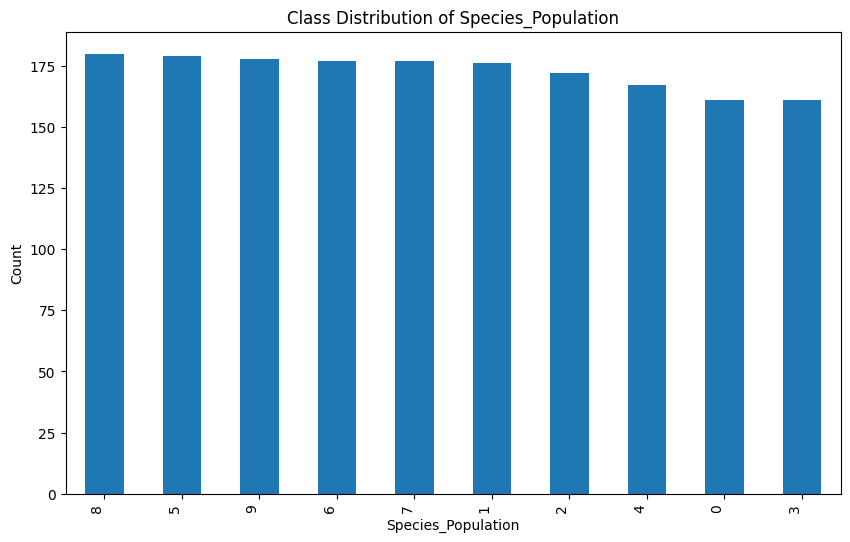

In [138]:
# Investigate class distribution
class_distribution = data["Species_Population"].value_counts()
print("Class distribution:\n", class_distribution)

# Visualize class distribution
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar')
plt.title('Class Distribution of Species_Population')
plt.xlabel('Species_Population')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()